### Problem Statement
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Importing Libraries

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from prettytable import PrettyTable
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Loading Data File

In [2]:
tdData = pd.read_csv('bank-full.csv',sep=',')

In [3]:
tdData.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Exploratory Data Analytics

#### Shape of the Data

In [4]:
tdData.shape

(45211, 17)

In [5]:
tdData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

##### Observation
There are 45,211 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.

For each observation, the dataset records 16 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts. There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.

#### Data type of each attribute

In [6]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in tdData.columns.to_list() if x not in categorical]
numerical.remove('Target')
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


#### Observation
There are 9 coulmns with non integer data. There are 8 columns that have integer values.

#### Checking the presence of missing values

In [7]:
tdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Observation
There is no missing value in this dataset.

#### 5 Point summary of numerical attributes

In [8]:
tdData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Checking the presence of outliers

In [9]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in tdData.columns.to_list() if x not in categorical]
bank_num = tdData[numerical]
q3 = bank_num.quantile(0.75)
q1 = bank_num.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)
bank_out = tdData[~((bank_num < (q1 - 1.5 * iqr)) |(bank_num > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(tdData.shape[0] - bank_out.shape[0]))

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64
17018 points are outliers based on IQR


#### Checking if data types are appropriate, getting rid of the missing values etc

There is no missing value in this dataset. However we will drop columns that are not necessary for Analysis

Step 1: Drop column "contact" which is useless

In [10]:
tdData2 = tdData.drop('contact', axis=1)

Step 2: Change the unit of 'duration' from seconds to minutes

In [11]:
tdData2['duration'] = tdData2['duration'].apply(lambda n:n/60).round(2)

Step 3: Change 'month' from words to numbers for easier analysis

In [12]:
lst = [tdData2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

### Data Visualization

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

1. Visualize the distribution of 'age' and 'balance

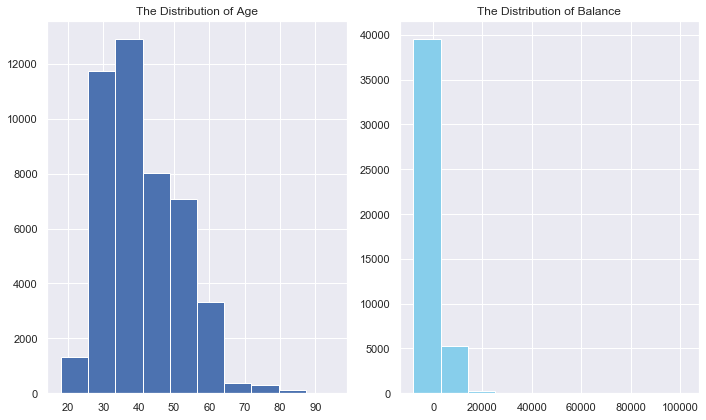

In [13]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(tdData2['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(tdData2['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

The distribution of age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 90 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

The distribution of balance: After dropping outliers in balance, the range of balance is still massive, from a minimum of -7500 to a maximum of 10443 euros, giving a range of 17943 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

2. Visualize the relationship between 'age' and 'balance'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


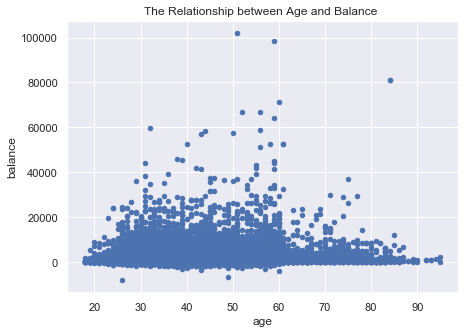

In [15]:
scatter_age_balance = tdData2.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Based on this scatter plot, there is no clear relationship between client’s age and balance level.

Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source

3. Visualize the distribution of 'duration' & 'campaign

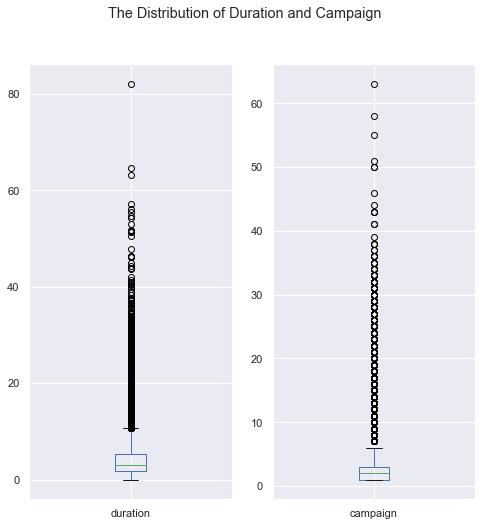

In [16]:
dist_dur_cam = tdData2[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

4. Visualize the relationship between 'duration' & 'campaign': with response result

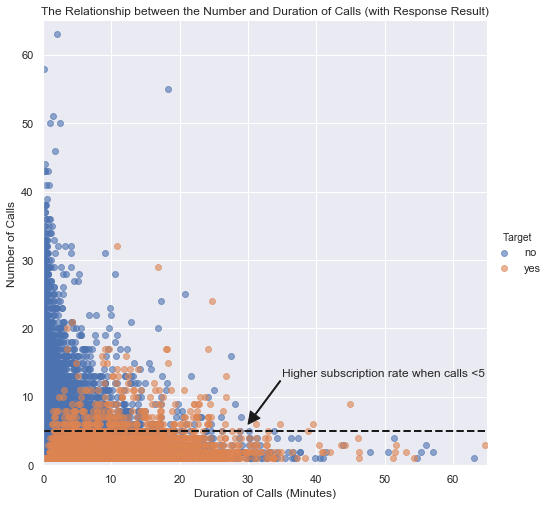

In [17]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = tdData2,
                     hue = 'Target',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

5.Scatter matrix and Correlation matrix

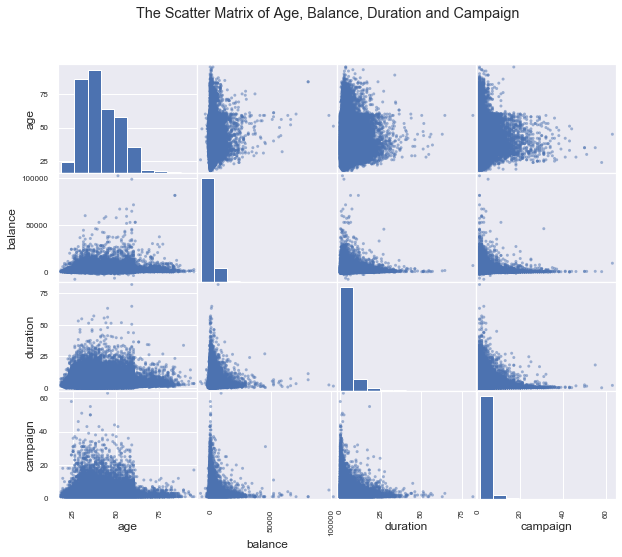

In [18]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(tdData2[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

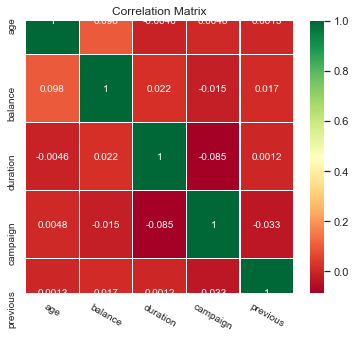

In [19]:
corr_data = tdData2[['age','balance','duration','campaign','previous']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

With a sound knowledge of the distribution of key variables, further analysis of each customer characteristic can be carried out to investigate its influence on the subscription rate.

### Preparing The Data to Train the Model

#### Train/ test split

In [20]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day','poutcome']
tdData2[encoding_list] = tdData2[encoding_list].apply(LabelEncoder().fit_transform)

In [21]:
Y = tdData2['Target']
X = tdData2.drop('Target', axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.3, random_state=2)

30% of the data will be used for testing

#### Build and Compare classification algorithms
Four different classification algorithms (Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.

In [23]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results_c = []
names_c = []
for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=2)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.889436 (0.004617)
KNN: 0.881631 (0.004603)
CART: 0.869940 (0.006219)
NB: 0.854583 (0.005390)


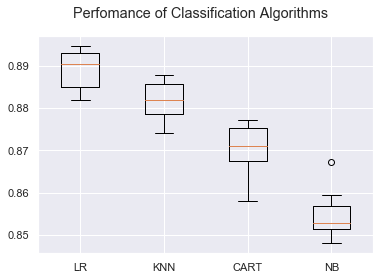

In [24]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

Logistic regression is the best performing model.

##### Among all Classification Algorithms, Logistic Regression achieved an accuracy of about 88%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

#### Testing the LR model on test Data

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
Y_predict = lr_model.predict(X_test)
tlr_score = lr_model.score(X_test, y_test)
print(tlr_score)
print(metrics.confusion_matrix(y_test, Y_predict))
print(metrics.classification_report(y_test, Y_predict))

0.892214685933353
[[11764   235]
 [ 1227   338]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11999
         yes       0.59      0.22      0.32      1565

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 89.26%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

### Build and Compare Ensamble models

#### Building the Decision Tree

In [26]:
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
model_entropy.score(X_train, y_train)
model_entropy.score(X_test, y_test)

0.8776172220583899

In [28]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [29]:
xvar = tdData2.drop('Target', axis=1)
feature_cols = xvar.columns

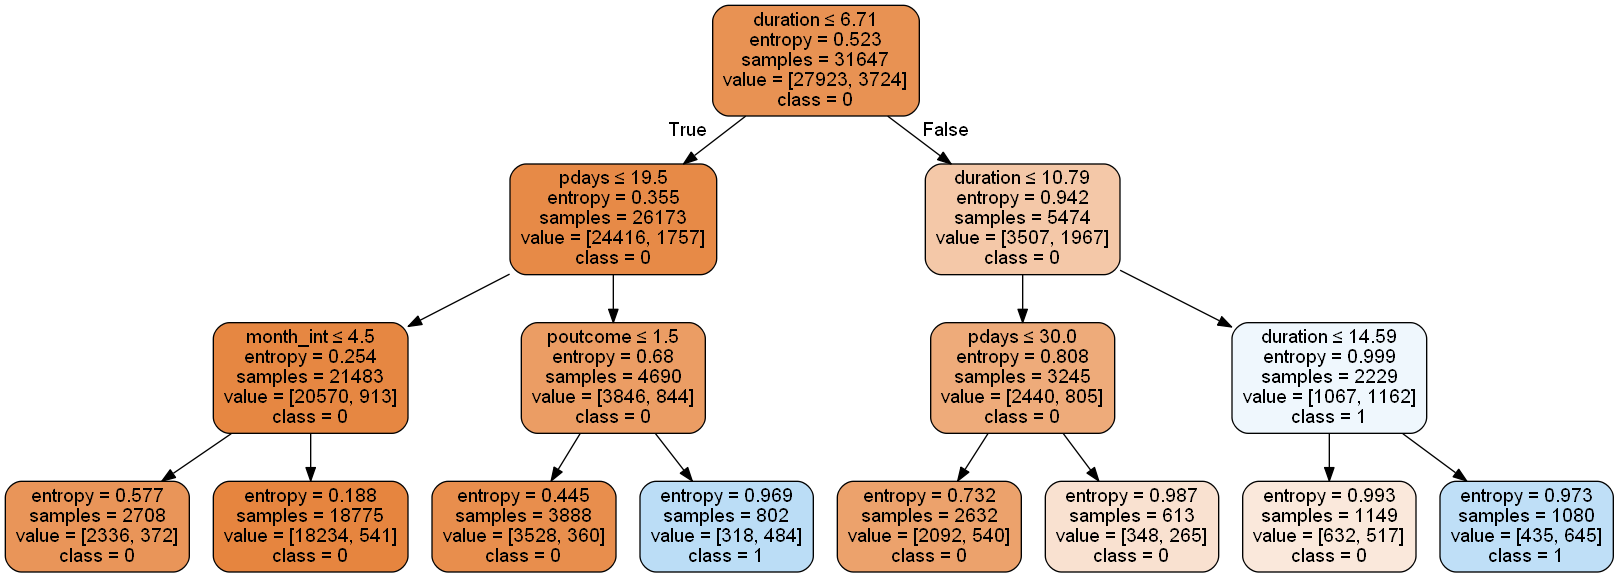

In [30]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from io import StringIO
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_pruned.png')
Image(graph.create_png())

In [31]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8953111176644057
0.8942079817992227


In [32]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [33]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.577748
pdays,0.177597
poutcome,0.161970
month_int,0.082685
age,0.000000
job,0.000000
marital,0.000000
education,0.000000
default,0.000000
balance,0.000000


In [34]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.895311


#### Creating a Random Forest model and comparing the results

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.895311
0,Random Forest,0.907549


#### Creating a Adaboost Ensemble Algorithm model and comparing the results


In [36]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.895311
0,Random Forest,0.907549
0,Adaboost,0.891920


Random forest model has a better accuracy (90.76%) then the Decision tree or the Adaboost Model

#### Creating a Bagging Classifier Algorithm model and comparing the results

In [38]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.895311
0,Random Forest,0.907549
0,Adaboost,0.891920
0,Bagging,0.904674


#### Creating a GradientBoost Classifier Algorithm model and comparing the results

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.895311
0,Random Forest,0.907549
0,Adaboost,0.891920
0,Bagging,0.904674
0,Gradient Boost,0.902610


#### Among all Ensemble algorithms, Random forest model (90.76%) and the Bagging model(90.59%) has a better accuracy then the Decision tree or the Adaboost Model or the Gradient boost Model, suggesting a high level of strength of this model to classify the customer response given all the defined customer features